# SCC-ICMC-USP - 1o. semestre de 2023
# SCC5948/MAI5024 - Exercício 4

### Profa. Roseli A. F. Romero

### Monitor: Diogo Godoi

Nro do grupo: 05

Alunos:


1.   Gabriel Bortoli - 5378290
2.   Lucas Maretti - 6789752


---


## Objetivos da prática:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.


---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Dígitos:** [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---


Após a análise dos dados e um pré-processamento vem a etapa de modelagem dos experimentos. Essa etapa pode requerer voltar no pré-processamento caso perceba-se que algo precisa ser feito. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Essa prática foca mais no processo de avaliação.
Para a avaliação é preciso definir qual a função de custo/erro adequada, e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado á escolha do algoritmo de classificação bem como a escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


### Questão 01.

- Caso a base escolhida tenha mais de 2 classes, transforme-a em um problema binário definindo uma classe como positiva e a outra como negativa. Você pode fazer isso uma vez e depois usar a nova base nas próximas questões.

- Outras operações como remoção de atributos podem ser feitas uma vez fora da função de pré-processamento.

- Implemente a função de pré-processamento para sua base aplicando as técnicas que achar necessário.


In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Num primeiro momento, vamos fazer todo o pré processamento separadamente, para avaliar (visualmente) cada etapa.
# Ao final, vamos criar a função com todas as etapas encapsuladas.

In [176]:
# Dataset escolhido - Câncer de mama:
X, y = load_breast_cancer(return_X_y= True, as_frame= True)
data = pd.concat([X,y], axis = 1)

In [67]:
# A base escolhida tem apenas 2 classes (1 e 0):
y.value_counts()

1    357
0    212
Name: target, dtype: int64

In [69]:
# Usaremos a função SMOTE, discutida no exercício anterior, para balancear as classes:
oversample = SMOTE()
new_X, new_y = oversample.fit_resample(X, y)

In [70]:
# Verificando a nova contagem do target:
new_y.value_counts()

0    357
1    357
Name: target, dtype: int64

In [75]:
# Não há nenhum dado faltante (NA):
print(new_X.isna().sum().sum())
print(new_y.isna().sum())

0
0


In [85]:
# Analisando os valores dos dados:
new_X.describe().loc[['mean']]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean,14.872119,19.807138,97.155497,729.154514,0.097617,0.112396,0.104028,0.057216,0.183081,0.062657,...,17.334645,26.512628,114.764944,1002.506532,0.134992,0.279387,0.310042,0.128859,0.296438,0.085363


In [88]:
# Como notamos que o intervalo entre dados tem uma variação muito grande, com médias variando de 0.06 até 719, optamos pela normalização de todos os dados para o intervalo de [0,1]:
min_max_scaler = preprocessing.MinMaxScaler()
new_X_norm = min_max_scaler.fit_transform(new_X)
new_X_norm = pd.DataFrame(new_X_norm, columns= new_X.columns)

new_X_norm.describe().loc[['mean']]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean,0.373473,0.341466,0.368775,0.248422,0.40613,0.285307,0.243739,0.284372,0.389298,0.267422,...,0.334566,0.386264,0.320509,0.200872,0.421459,0.244586,0.247638,0.442815,0.275849,0.198893


In [1]:
# Agora vamos separar os dados em conjuntos de treino/teste, na proporção 80/20:
X_train, X_test, y_train, y_test = train_test_split(new_X_norm , new_y,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)

# Mostrando os valores de cada conjunto:
print('Shape atributos de treino:', X_train.shape)
print('Shape atributos de teste:', X_test.shape)
print('Shape target de treino:', y_train.shape)
print('Shape target de teste:', y_test.shape)

NameError: name 'train_test_split' is not defined

In [179]:
# Agora, com todas as etapas testadas, vamos encapsular em uma única função, que receberá o dataframe
# e devolverá os conjuntos de treino e teste já separados

def preprocess(data):

    # Separando entre atributos e target:
    X = data.iloc[:, :-1] # Retorna todas as colunas exceto a última
    y = data.iloc[:, -1:] # Retorna apenas a última coluna

    # Equalizando as classes:
    oversample = SMOTE()
    new_X, new_y = oversample.fit_resample(X, y)

    # Normalizando os valores para [0,1]:
    min_max_scaler = preprocessing.MinMaxScaler()
    new_X_norm = min_max_scaler.fit_transform(new_X)
    new_X_norm = pd.DataFrame(new_X_norm, columns= new_X.columns)

    # Separando os conjuntos de treino e teste:
    X_treino, X_teste, y_treino, y_test = train_test_split(new_X_norm , new_y,
                                                    shuffle= True,
                                                    test_size= 0.2,
                                                    random_state= 1)

    return X_treino, X_teste, y_treino, y_test

# Para facilitar o uso nas próximas etapas, também vamos usar uma função que recebe um dataframe
# e retorna um dataframe também completo, sem divisão entre treino/teste, baseado na função acima.

def preprocess2(data):
    X_treino, X_teste, y_treino, y_teste = preprocess(data)
    
    treino = pd.concat([X_treino,y_treino], axis = 1)
    teste = pd.concat([X_teste,y_teste], axis = 1)

    new_data = pd.concat([treino,teste], axis = 0)

    return new_data

In [169]:
# Agora vamos usar um modelo the árvore de decisão (Decision Tree model):
dtc = tree.DecisionTreeClassifier(random_state= 0)
dtc.fit(X_train, y_train)

predicted = dtc.predict(X_test)

actual = y_test.to_numpy()

# Observação: estamos usando esses modelos fora da questão 03 apenas para testar as próximas funções.

In [170]:
# Para comparar, também vamos usar um modelo de random forest:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

predicted2 = rf.predict(X_test)

### Questão 02.

Implemente a função que retorna a matriz de confusão, escolha duas métricas e crie 2 funções, sendo  uma função para cada métrica calculada a partir da matriz confusão.

In [171]:
def confusion_matrix(y_test, y_pred):
    
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    
    for i in range(len(actual)):
        if actual[i] == 1 and predicted[i] == 1:
            true_positives += 1
        elif actual[i] == 0 and predicted[i] == 0:
            true_negatives += 1
        elif actual[i] == 0 and predicted[i] == 1:
            false_positives += 1
        elif actual[i] == 1 and predicted[i] == 0:
            false_negatives += 1
    
    conf = np.array([[true_negatives, false_positives], [false_negatives, true_positives]])
    return conf

# actual    = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])
# predicted = np.array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [172]:
# Visualizando as matrizes de confusão para nossos 2 modelos:

dtc_CM = confusion_matrix(actual, predicted)
rf_CM = confusion_matrix(actual, predicted2)

print("Matriz do modelo Decision Tree:\n",dtc_CM, "\n")

print("Matriz do modelo Random Forest:\n",rf_CM, "\n")

Matriz do modelo Decision Tree:
 [[70  7]
 [ 2 64]] 

Matriz do modelo Random Forest:
 [[70  7]
 [ 2 64]] 



In [163]:
# Coincidentemente, ambos tiveram a mesma performance, então vamos calcular as métricas apenas para um resultado:

In [268]:
def f1_score(actual, predicted):
    """
    Calculate the F1-score for a binary classification problem.
    
    Parameters:
    actual (list): A list of actual class labels.
    predicted (list): A list of predicted class labels.
    
    Returns:
    The F1-score as a float value.
    """
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    
    for i in range(len(actual)):
        if actual[i] == 1 and predicted[i] == 1:
            true_positives += 1
        elif actual[i] == 0 and predicted[i] == 1:
            false_positives += 1
        elif actual[i] == 1 and predicted[i] == 0:
            false_negatives += 1

    
    precision = 0 if (true_positives + false_positives) == 0 else true_positives / (true_positives + false_positives) 
    recall = 0 if (true_positives + false_negatives) == 0 else true_positives / (true_positives + false_negatives)
    
    f1_score = 0 if (precision + recall) == 0 else (2 * (precision * recall) / (precision + recall))

    return f1_score

f1 = f1_score(actual, predicted)
print('F1-Score: ', round(f1,4))

F1-Score:  0.9343


In [269]:
def precision(actual, predicted):

    true_positives = 0
    false_positives = 0
    false_negatives = 0
    
    for i in range(len(actual)):
        if actual[i] == 1 and predicted[i] == 1:
            true_positives += 1
        elif actual[i] == 0 and predicted[i] == 1:
            false_positives += 1
        elif actual[i] == 1 and predicted[i] == 0:
            false_negatives += 1
    
    precision = true_positives / (true_positives + false_positives)

    return precision

prec = precision(actual, predicted)
print('Precision: ', round(prec,4))

Precision:  0.9014


In [270]:
def recall(actual, predicted):
    """
    Calculate the F1-score for a binary classification problem.
    
    Parameters:
    actual (list): A list of actual class labels.
    predicted (list): A list of predicted class labels.
    
    Returns:
    The F1-score as a float value.
    """
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    
    for i in range(len(actual)):
        if actual[i] == 1 and predicted[i] == 1:
            true_positives += 1
        elif actual[i] == 0 and predicted[i] == 1:
            false_positives += 1
        elif actual[i] == 1 and predicted[i] == 0:
            false_negatives += 1
    
    recall = true_positives / (true_positives + false_negatives)

    return recall

rec = recall(actual, predicted)
print('Recall: ', round(rec,4))

Recall:  0.9697


Uma boa prática é escolher modelos mais simples, dados dois modelos com desempenho similar a escolha do mais simples é indicada pois com isso há algumas garantias de melhor generalização. Generalização, de maneira geral, é a propriedade que garante que o classificador terá desempenho parecido ao reportado no conjunto de teste.

A definição da complexidade de um modelo nem sempre é uma tarefa fácil. Uma maneira de tentar mensurar isso é através do número de parâmetros do modelo, do tipo de função que ele implementa (linear ou não linear, cortes ortogonais no espaço, ...).

### Questão 03.

Complete e execute a função *classificacao* definida no notebook.

- Aplique validação cruzada
- Use sua função de pré-processamento
- Use suas métricas de avaliação
- Diga qual o modelo tem o melhor desempenho e explique porque você acha isso.

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from numpy import mean, std
import numpy as np


def split_dataframe(data, n_folds):
    """
    Split a pandas dataframe into n folds, after preprocessing it.
    
    Parameters:
    data (pandas.DataFrame): The pandas dataframe to be split.
    n_folds (int): The number of folds to create.
    
    Returns:
    A list of n_folds tuples, where each tuple contains the training and validation data as pandas dataframes.
    """

    data = preprocess2(data)

    n_samples = len(data)
    fold_size = n_samples // n_folds
    
    indices = list(range(n_samples))
    np.random.shuffle(indices)
    
    folds = []
    for i in range(n_folds):
        start = i * fold_size
        end = (i + 1) * fold_size if i < n_folds - 1 else n_samples
        
        val_indices = indices[start:end]
        train_indices = indices[:start] + indices[end:]
        
        train_data = data.iloc[train_indices]
        val_data = data.iloc[val_indices]
        
        folds.append((train_data, val_data))
    
    return folds


def classificacao(data, score_fn, score_name,
                  folds= 5, plot= True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    preproc_fn: Função. Faz o pré-processamento da base já separada em treino e teste 
    score_fn:   Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 2 modelos (perceptron, Árvore de decisão)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    dt = DecisionTreeClassifier(criterion= 'gini',
                                splitter= 'best',
                                min_samples_split= int(len(data)*0.1))
    rf = RandomForestClassifier(random_state=0) # Adicionando mais um modelo
        
    clfs = [prcp, dt, rf]
    clfs_names = ['perceptron', 'dt', 'rf']
  
    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    ####
    
    Folds = split_dataframe(data, folds)
    
    ####
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[], 'rf':[]}
    for c, c_name in zip(clfs, clfs_names):
        
        # para cada split 
        
        for i in range(len(Folds)):            

            # separa conjunto de treino e de teste
            ####
            X_train = Folds[i][0].iloc[:,:-1]
            y_train = Folds[i][0].iloc[:,-1:]
            
            X_val = Folds[i][1].iloc[:,:-1]
            y_val = Folds[i][1].iloc[:,-1:]
            
            ####
            
           # faz o treino do modelo
            clf = c.fit(X= X_train, y= y_train.values.ravel())
            
            # valores preditos pelo classificador
            y_pred = clf.predict(X_val)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_val)
            
            # realiza predição no conjunto de teste e salva o resultado
            ####
            ####
            resultado = score_fn(y_test, y_pred)
            
            results[c_name].append(resultado)
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

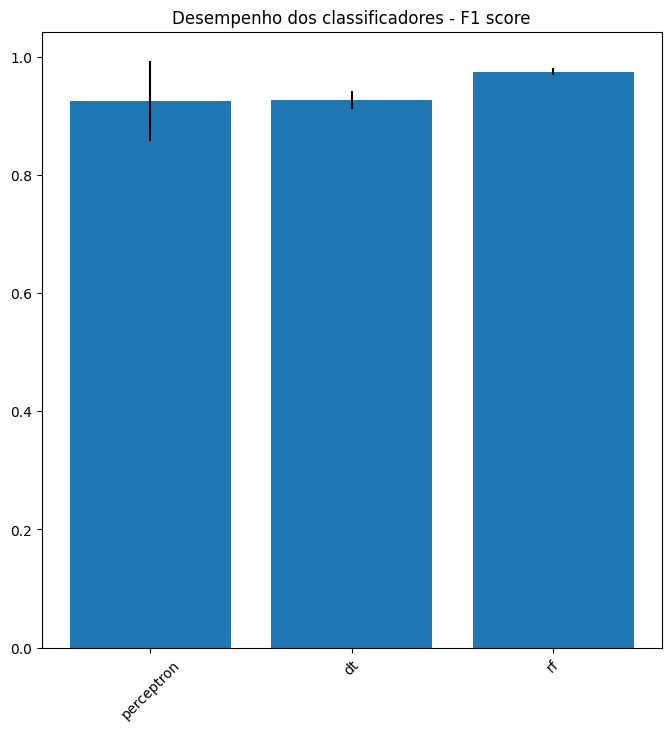

{'results': {'perceptron': [0.9343065693430657,
   0.9801324503311257,
   0.793388429752066,
   0.967741935483871,
   0.9503546099290779],
  'dt': [0.9302325581395349,
   0.943661971830986,
   0.8985507246376813,
   0.9230769230769231,
   0.9379310344827587],
  'rf': [0.984375,
   0.9726027397260274,
   0.965034965034965,
   0.9733333333333333,
   0.979020979020979]},
 'clfs': [Perceptron(),
  DecisionTreeClassifier(min_samples_split=56),
  RandomForestClassifier(random_state=0)]}

In [279]:
# Chama a função com suas métricas

classificacao(data, f1_score, 'F1 score')

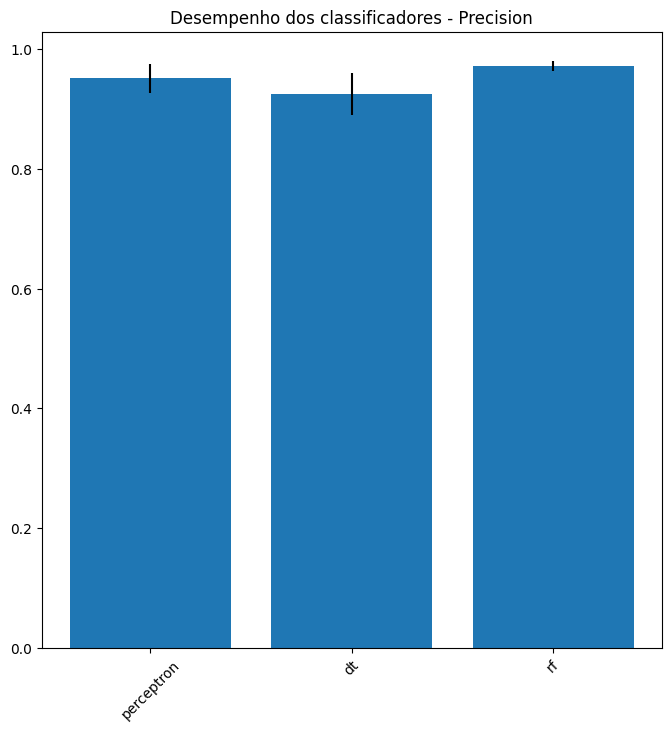

{'results': {'perceptron': [0.9736842105263158,
   0.935064935064935,
   0.9186046511627907,
   0.9841269841269841,
   0.9436619718309859],
  'dt': [0.9333333333333333,
   0.9315068493150684,
   0.9342105263157895,
   0.8611111111111112,
   0.9666666666666667],
  'rf': [0.9857142857142858,
   0.958904109589041,
   0.9746835443037974,
   0.9696969696969697,
   0.9696969696969697]},
 'clfs': [Perceptron(),
  DecisionTreeClassifier(min_samples_split=56),
  RandomForestClassifier(random_state=0)]}

In [280]:
classificacao(data, precision, 'Precision')

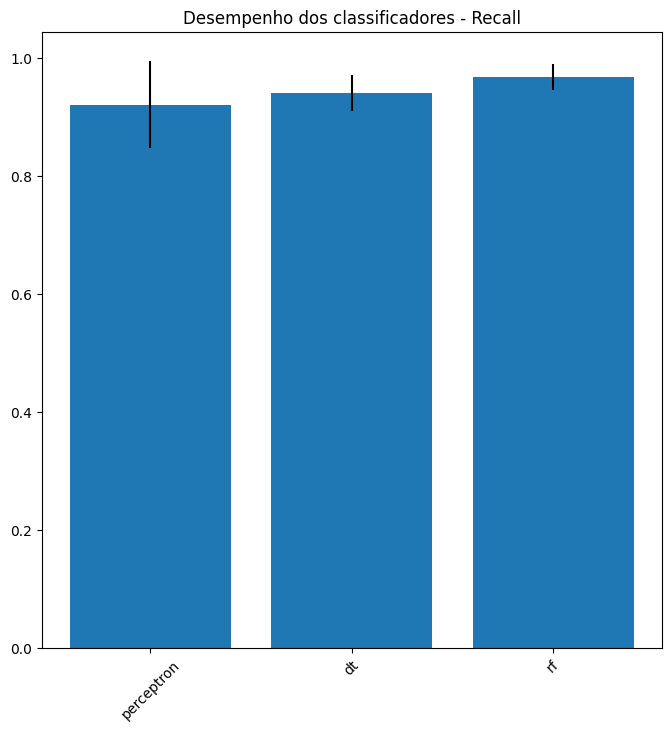

{'results': {'perceptron': [0.7857142857142857,
   0.9516129032258065,
   0.9625,
   0.9054054054054054,
   1.0],
  'dt': [0.9142857142857143,
   0.9838709677419355,
   0.9,
   0.9594594594594594,
   0.9436619718309859],
  'rf': [0.9428571428571428,
   1.0,
   0.9625,
   0.9459459459459459,
   0.9859154929577465]},
 'clfs': [Perceptron(),
  DecisionTreeClassifier(min_samples_split=56),
  RandomForestClassifier(random_state=0)]}

In [281]:
classificacao(data, recall, 'Recall')

---

### Questão 04.

Utilizar os 2 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;

Para o dataset escolhido, executar os 2 procedimentos acima para estimar o desempenho. Avalie a diferença na variância entre essas abordagens.

  * Você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.

Essas execuções podem demorar um pouco, então tenham paciência.

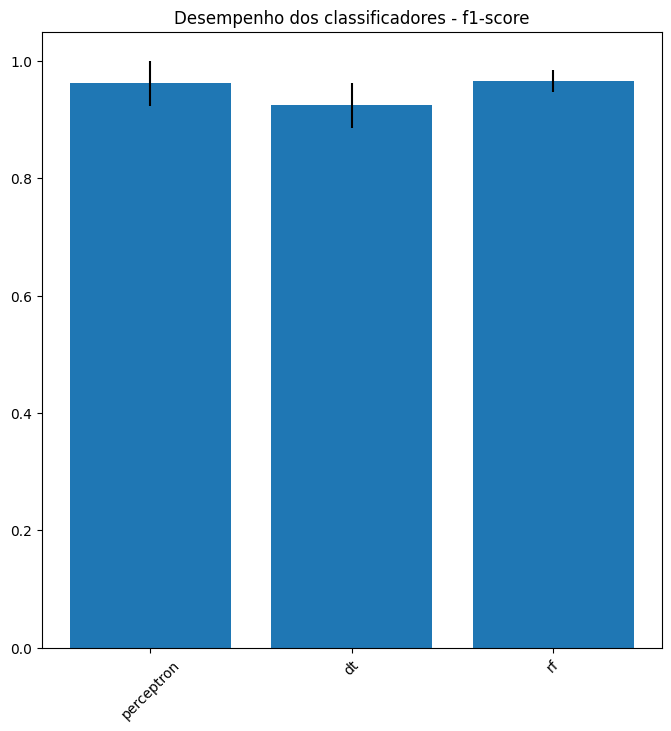

{'results': {'perceptron': [1.0,
   0.9444444444444444,
   1.0,
   1.0,
   0.8928571428571428,
   1.0,
   0.9142857142857143,
   0.9315068493150686,
   0.9487179487179488,
   0.9841269841269841],
  'dt': [0.9382716049382716,
   0.8235294117647058,
   0.9620253164556963,
   0.9032258064516129,
   0.909090909090909,
   0.9487179487179488,
   0.935064935064935,
   0.923076923076923,
   0.9473684210526315,
   0.9523809523809523],
  'rf': [0.9629629629629629,
   0.9428571428571428,
   0.9876543209876543,
   0.9846153846153847,
   0.9508196721311476,
   1.0,
   0.972972972972973,
   0.9428571428571428,
   0.9599999999999999,
   0.9508196721311476]},
 'clfs': [Perceptron(),
  DecisionTreeClassifier(min_samples_split=56),
  RandomForestClassifier(random_state=0)]}

In [282]:
# Chama a função com 10-fold cross validation
classificacao(data, f1_score, 'f1-score', 10)

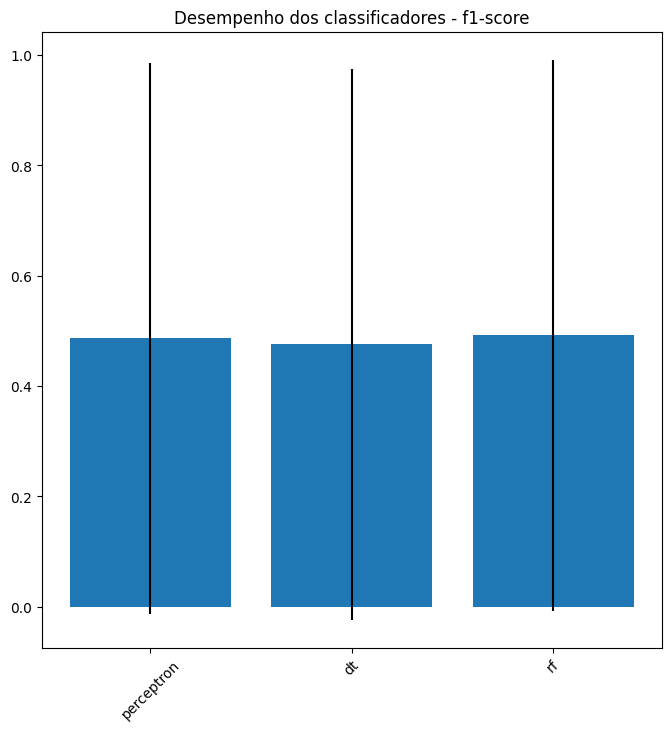

{'results': {'perceptron': [0,
   0,
   0,
   0,
   0,
   0,
   1.0,
   0,
   0,
   0,
   0,
   0,
   1.0,
   1.0,
   1.0,
   0,
   1.0,
   0,
   1.0,
   1.0,
   1.0,
   1.0,
   0,
   1.0,
   0,
   0,
   0,
   1.0,
   0,
   0,
   0,
   0,
   1.0,
   0,
   0,
   1.0,
   0,
   0,
   1.0,
   0,
   1.0,
   0,
   1.0,
   0,
   0,
   1.0,
   1.0,
   1.0,
   1.0,
   0,
   0,
   1.0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1.0,
   0,
   1.0,
   0,
   0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0,
   0,
   1.0,
   1.0,
   0,
   0,
   0,
   0,
   1.0,
   0,
   0,
   0,
   0,
   1.0,
   0,
   0,
   1.0,
   0,
   0,
   1.0,
   1.0,
   1.0,
   0,
   1.0,
   1.0,
   0,
   1.0,
   1.0,
   0,
   0,
   0,
   0,
   1.0,
   1.0,
   1.0,
   0,
   1.0,
   1.0,
   0,
   0,
   1.0,
   0,
   0,
   1.0,
   0,
   1.0,
   1.0,
   1.0,
   0,
   0,
   0,
   0,
   0,
   0,
   1.0,
   0,
   0,
   0,
   1.0,
   0,
   0,
   0,
   1.0,
   1.0,
   0,
   

In [283]:
# Chama a função com leave-one-out

classificacao(data, f1_score, 'f1-score', folds=data.shape[0], plot=True)

Notamos que com o Leave-one-out os resultados foram piores na média.
Apesar de conseguirmos valores absolutos melhores (quando a predição é igual ao valor atual), isso ocorreu menos vezes.